# PDC PROJECT
  - Nooran Ishtiaq
  - Umaima Hashmi
  - Zoha Wajahat

# DATA PREPROCESSING

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('pdc_dataset_with_target.csv')

In [ ]:
df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.75,55.0,B,875.98,No,8,44.16,0
1,31.33,39.0,C,839.91,No,4,13.93,1
2,23.87,10.0,A,1364.70,Yes,4,15.16,0
3,35.64,34.0,C,1462.07,No,4,15.71,1
4,NaN,NaN,C,710.61,No,8,13.77,1
5,28.00,99.0,B,855.72,Yes,3,NaN,0
6,28.46,29.0,C,853.70,No,5,22.65,0
7,29.21,59.0,C,1122.96,No,6,4.75,0
8,34.03,18.0,C,1289.26,Yes,2,24.10,0
9,42.65,47.0,A,1600.50,No,7,2.07,1


In [ ]:
df.shape

(41000, 8)

In [ ]:
df.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'target'],
      dtype='object')

In [ ]:
print(df.dtypes)

feature_1    float64
feature_2    float64
feature_3     object
feature_4    float64
feature_5     object
feature_6      int64
feature_7    float64
target         int64
dtype: object


In [ ]:
df.isnull().sum()

,0
feature_1,2054
feature_2,2050
feature_3,0
feature_4,2054
feature_5,0
feature_6,0
feature_7,2036
target,0


Drop Duplicates

In [ ]:
df.drop_duplicates(subset=None, keep='first', inplace=True)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.75,55.0,B,875.98,No,8,44.16,0
1,31.33,39.0,C,839.91,No,4,13.93,1
2,23.87,10.0,A,1364.70,Yes,4,15.16,0
3,35.64,34.0,C,1462.07,No,4,15.71,1
4,NaN,NaN,C,710.61,No,8,13.77,1


In [ ]:
df.isnull().sum()

,0
feature_1,2004
feature_2,2002
feature_3,0
feature_4,2000
feature_5,0
feature_6,0
feature_7,2002
target,0


In [ ]:
columns_to_fill = ['feature_1', 'feature_2', 'feature_4', 'feature_7']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())
print(df.isnull().sum())

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
feature_6    0
feature_7    0
target       0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['feature_5'] = label_encoder.fit_transform(df['feature_5'])
df['feature_3'] = label_encoder.fit_transform(df['feature_3'])

In [ ]:
df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.75,55.0,1,875.98,0,8,44.16,0
1,31.33,39.0,2,839.91,0,4,13.93,1
2,23.87,10.0,0,1364.70,1,4,15.16,0
3,35.64,34.0,2,1462.07,0,4,15.71,1
4,30.00,49.0,2,710.61,0,8,13.77,1
5,28.00,99.0,1,855.72,1,3,14.20,0
6,28.46,29.0,2,853.70,0,5,22.65,0
7,29.21,59.0,2,1122.96,0,6,4.75,0
8,34.03,18.0,2,1289.26,1,2,24.10,0
9,42.65,47.0,0,1600.50,0,7,2.07,1


In [ ]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
count,40045.000000,40045.000000,40045.000000,40045.000000,40045.000000,40045.000000,40045.000000,40045.000000
mean,29.991503,49.383344,1.000200,1089.914633,0.500087,5.009789,22.774362,0.398127
std,4.875813,28.236482,0.817139,997.068496,0.500006,2.583111,46.860120,0.489518
min,7.670000,0.000000,0.000000,-155.620000,0.000000,1.000000,0.000000,0.000000
25%,26.810000,26.000000,0.000000,813.240000,0.000000,3.000000,6.210000,0.000000
50%,30.000000,49.000000,1.000000,1004.880000,1.000000,5.000000,14.200000,0.000000
75%,33.180000,73.000000,2.000000,1195.480000,1.000000,7.000000,27.300000,1.000000
max,52.400000,99.000000,2.000000,17643.400000,1.000000,9.000000,1660.800000,1.000000


Class Visualization

[0 1] [24102 15943]


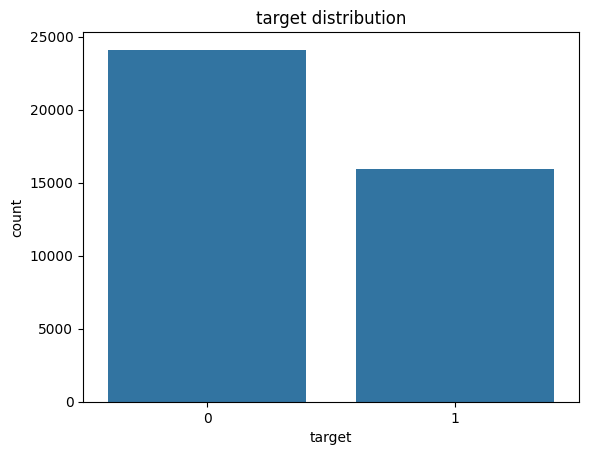

In [ ]:
import numpy as np
import seaborn as sns
(unique,counts)=np.unique(df['target'],return_counts=True)
print(unique,counts)
sns.barplot(x=unique,y=counts)
plt.xlabel('target')
plt.ylabel('count')
plt.xticks()
plt.title('target distribution')
plt.show()


In [ ]:
from scipy.stats import skew
skewness_all = df.apply(lambda x: skew(x))
print(skewness_all)

feature_1    -0.003669
feature_2     0.010503
feature_3    -0.000367
feature_4     9.897305
feature_5    -0.000350
feature_6    -0.002481
feature_7    15.113799
target        0.416222
dtype: float64


Apply log transformation

In [ ]:
import numpy as np
df['feature_4'] = np.log1p(df['feature_4'])
df['feature_7'] = np.log1p(df['feature_7'])


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.75,55.0,1,6.776484,0,8,3.810212,0
1,31.33,39.0,2,6.734485,0,4,2.703373,1
2,23.87,10.0,0,7.219422,1,4,2.782539,0
3,35.64,34.0,2,7.288292,0,4,2.816007,1
4,30.00,49.0,2,6.567530,0,8,2.692598,1


In [ ]:
skewness_transformed = df.apply(lambda x: skew(x))
print(skewness_transformed)

feature_1   -0.003669
feature_2    0.010503
feature_3   -0.000367
feature_4         NaN
feature_5   -0.000350
feature_6   -0.002481
feature_7   -0.167044
target       0.416222
dtype: float64


In [ ]:
df.isnull().sum()

,0
feature_1,0
feature_2,0
feature_3,0
feature_4,19
feature_5,0
feature_6,0
feature_7,0
target,0


Fill the empty values with median

In [ ]:
df['feature_4'] = df['feature_4'].fillna(df['feature_4'].median())


In [ ]:
df.isnull().sum()

,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,0
feature_6,0
feature_7,0
target,0


In [ ]:
skewness_transformed = df.apply(lambda x: skew(x))
print(skewness_transformed)

feature_1   -0.003669
feature_2    0.010503
feature_3   -0.000367
feature_4    0.312861
feature_5   -0.000350
feature_6   -0.002481
feature_7   -0.167044
target       0.416222
dtype: float64


# Outlier detection

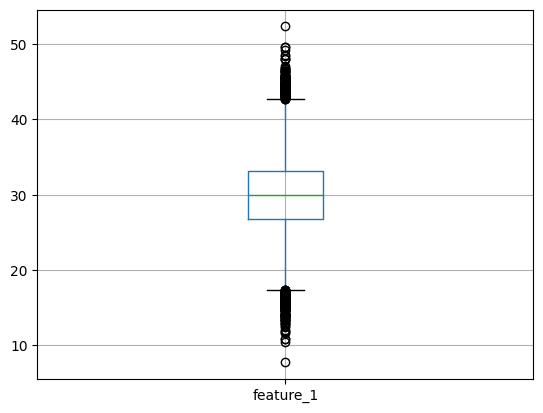

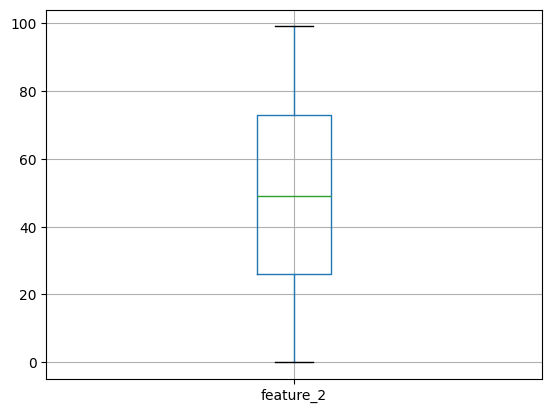

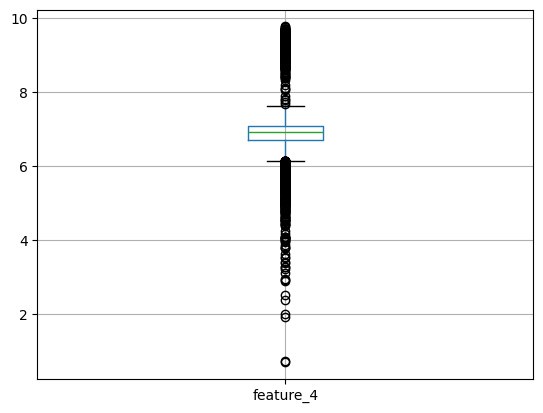

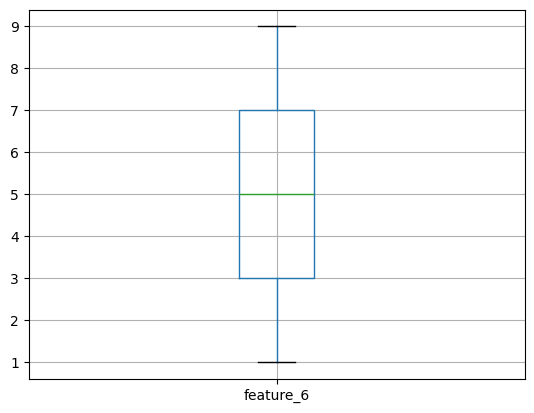

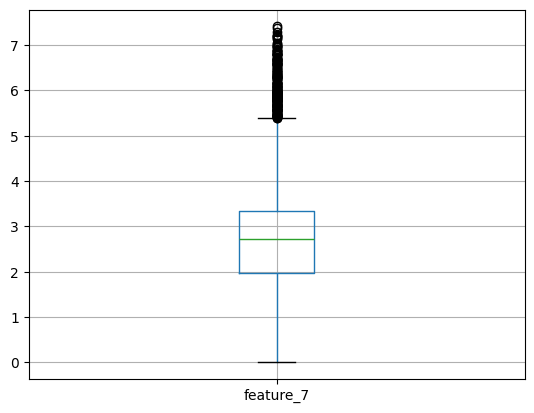

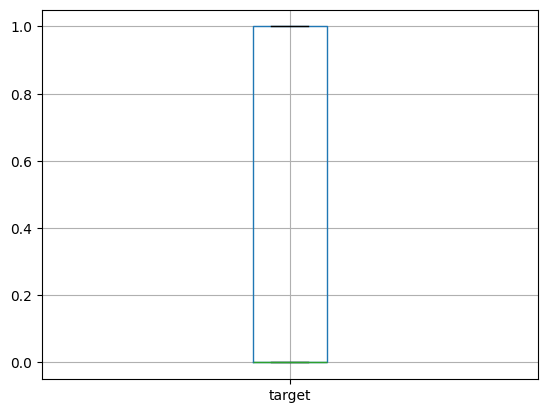

In [ ]:
df.boxplot(column='feature_1')
plt.show()

df.boxplot(column='feature_2')
plt.show()

df.boxplot(column='feature_4')
plt.show()

df.boxplot(column='feature_6')
plt.show()

df.boxplot(column='feature_7')
plt.show()

df.boxplot(column='target')
plt.show()

Remove Outliers using IQR

In [ ]:

columns_to_check = ['feature_1', 'feature_4', 'feature_7']

# Iterate through the specified columns
for column in columns_to_check:
    # Calculate the first and third quartile (Q1 and Q3) and the IQR (Interquartile Range)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and print the outliers for this column
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers in column '{column}':")
    print(outliers)
    print("\n" + "-"*10 + "\n")

    # Remove the outliers from the DataFrame
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


Outliers in column 'feature_1':
       feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
104        11.99       25.0          2   7.271002          0          1   
208        43.93       47.0          2   6.614940          0          3   
229        16.81       80.0          0   6.878471          1          8   
450        45.59       49.0          1   6.913618          1          1   
540        47.14       89.0          2   6.752294          1          8   
...          ...        ...        ...        ...        ...        ...   
40711      11.82       50.0          0   6.844144          1          4   
40858      11.72        6.0          2   6.600034          1          8   
40876      43.21       49.0          2   6.942108          1          6   
40890      14.67       82.0          0   6.913618          0          7   
40973      12.52       39.0          1   7.213754          1          2   

       feature_7  target  
104     1.642873       1  
208     2.802

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['feature_1', 'feature_2','feature_4', 'feature_6', 'feature_7']

scaler = StandardScaler()

# Apply scaling
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Check the scaled DataFrame
print(df.head())


   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -0.479955   0.199856          1  -0.437163          0   1.155857   
1   0.285469  -0.367027          2  -0.591259          0  -0.393965   
2  -1.309521  -1.394502          0   1.187983          1  -0.393965   
3   1.206971  -0.544178          2   1.440667          0  -0.393965   
4   0.001107  -0.012725          2  -1.203818          0   1.155857   

   feature_7  target  
0   1.196315       0  
1   0.089618       1  
2   0.168774       0  
3   0.202238       1  
4   0.078845       1  


In [ ]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,-0.479955,0.199856,1,-0.437163,0,1.155857,1.196315,0
1,0.285469,-0.367027,2,-0.591259,0,-0.393965,0.089618,1
2,-1.309521,-1.394502,0,1.187983,1,-0.393965,0.168774,0
3,1.206971,-0.544178,2,1.440667,0,-0.393965,0.202238,1
4,0.001107,-0.012725,2,-1.203818,0,1.155857,0.078845,1


# ANALYSIS OF MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve

In [ ]:
model={}
model['logistic_regression']=LogisticRegression()
model['decision_tree']=DecisionTreeClassifier()
model['random_forest']=RandomForestClassifier()
model['gradient_boosting']=GradientBoostingClassifier()
model['linear_svc']=LinearSVC()
model['xgboost']=XGBClassifier()
model['knn']=KNeighborsClassifier()
model['naive_bayes']=GaussianNB()

logistic_regression Accuracy: 0.6070482246952835
Classification Report for logistic_regression:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      4582
           1       0.00      0.00      0.00      2966

    accuracy                           0.61      7548
   macro avg       0.30      0.50      0.38      7548
weighted avg       0.37      0.61      0.46      7548

ROC AUC Score for logistic_regression: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


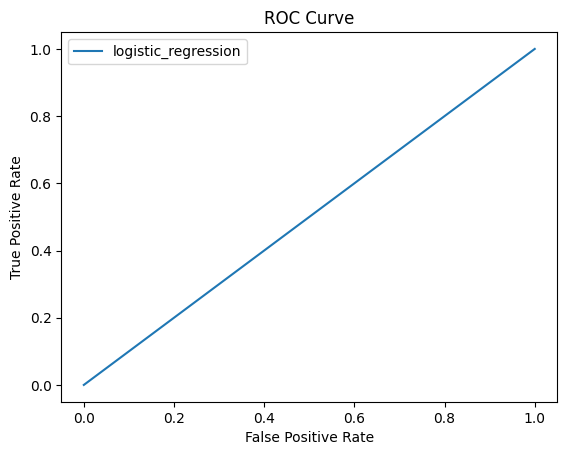

decision_tree Accuracy: 0.5225225225225225
Classification Report for decision_tree:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60      4582
           1       0.40      0.41      0.40      2966

    accuracy                           0.52      7548
   macro avg       0.50      0.50      0.50      7548
weighted avg       0.53      0.52      0.52      7548

ROC AUC Score for decision_tree: 0.5029143033235979


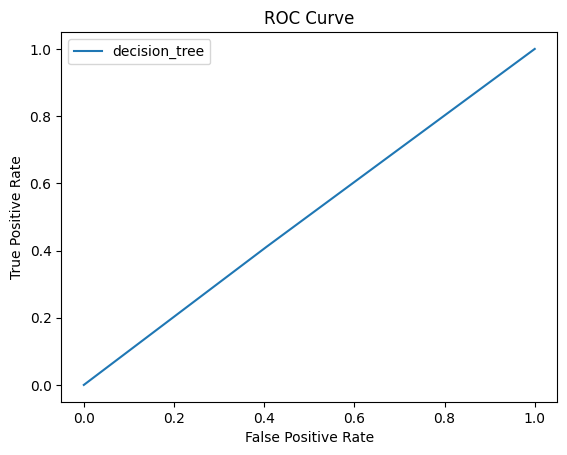

random_forest Accuracy: 0.5763116057233705
Classification Report for random_forest:
              precision    recall  f1-score   support

           0       0.61      0.85      0.71      4582
           1       0.40      0.16      0.23      2966

    accuracy                           0.58      7548
   macro avg       0.50      0.50      0.47      7548
weighted avg       0.53      0.58      0.52      7548

ROC AUC Score for random_forest: 0.5024488212545912


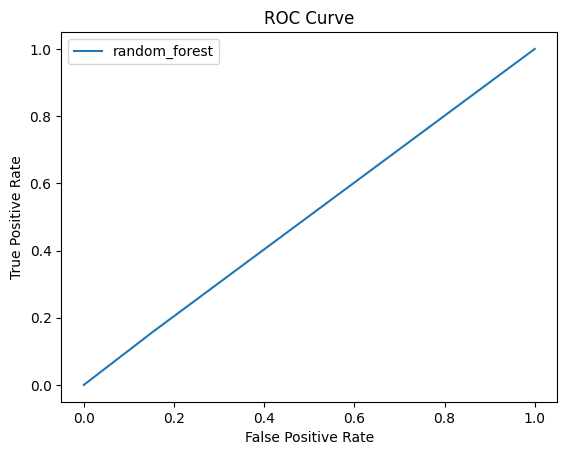

gradient_boosting Accuracy: 0.6069157392686805
Classification Report for gradient_boosting:
              precision    recall  f1-score   support

           0       0.61      0.99      0.75      4582
           1       0.49      0.01      0.02      2966

    accuracy                           0.61      7548
   macro avg       0.55      0.50      0.39      7548
weighted avg       0.56      0.61      0.46      7548

ROC AUC Score for gradient_boosting: 0.5014366957630978


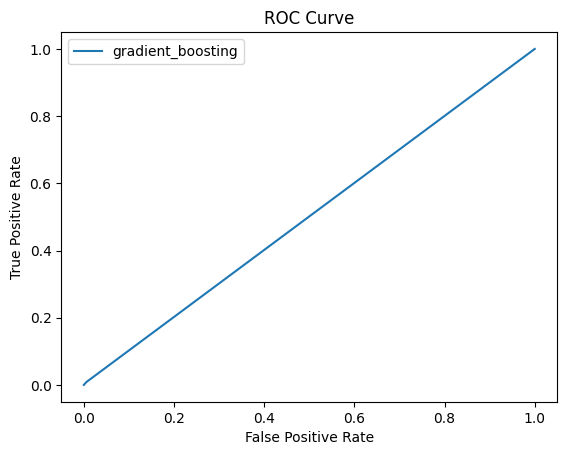

linear_svc Accuracy: 0.6070482246952835
Classification Report for linear_svc:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      4582
           1       0.00      0.00      0.00      2966

    accuracy                           0.61      7548
   macro avg       0.30      0.50      0.38      7548
weighted avg       0.37      0.61      0.46      7548

ROC AUC Score for linear_svc: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


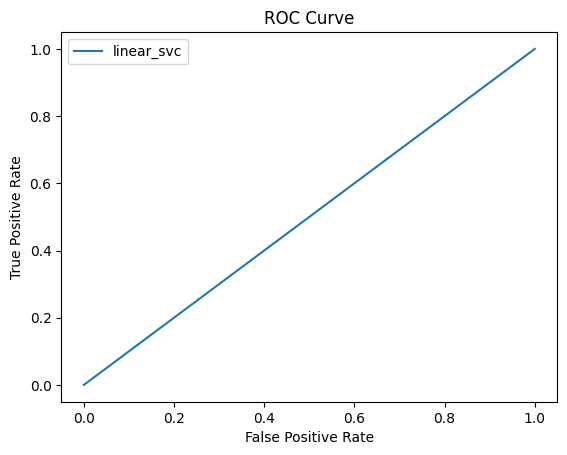

xgboost Accuracy: 0.5773714891361951
Classification Report for xgboost:
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      4582
           1       0.41      0.17      0.24      2966

    accuracy                           0.58      7548
   macro avg       0.51      0.51      0.48      7548
weighted avg       0.53      0.58      0.52      7548

ROC AUC Score for xgboost: 0.5060567119924251


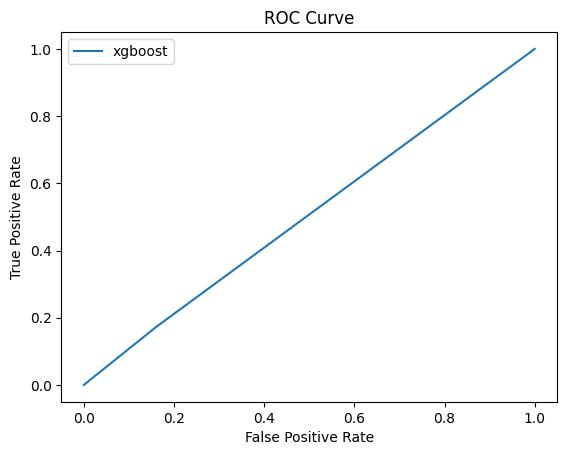

knn Accuracy: 0.5433227344992051
Classification Report for knn:
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      4582
           1       0.40      0.33      0.36      2966

    accuracy                           0.54      7548
   macro avg       0.51      0.51      0.50      7548
weighted avg       0.53      0.54      0.53      7548

ROC AUC Score for knn: 0.5053018304644549


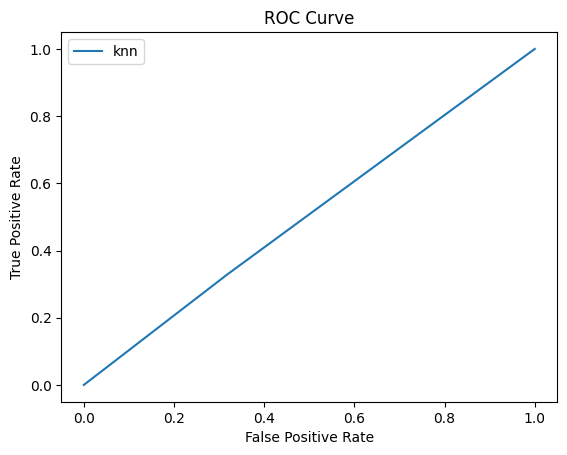

naive_bayes Accuracy: 0.6070482246952835
Classification Report for naive_bayes:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      4582
           1       0.00      0.00      0.00      2966

    accuracy                           0.61      7548
   macro avg       0.30      0.50      0.38      7548
weighted avg       0.37      0.61      0.46      7548

ROC AUC Score for naive_bayes: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


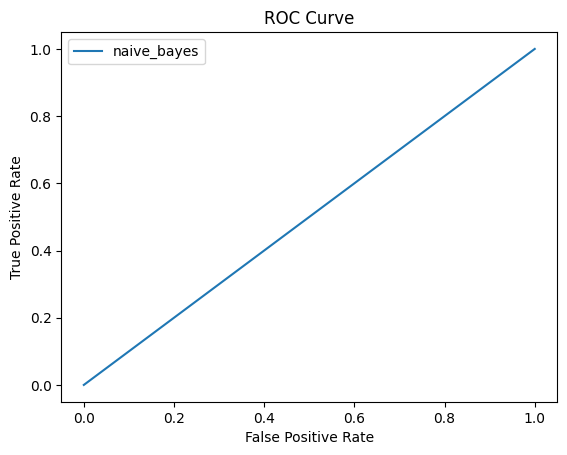

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store accuracy for each model
accuracy_scores = {}

for key in model.keys():
    model[key].fit(X_train, y_train)
    y_pred = model[key].predict(X_test)

    # Compute and store the accuracy score
    accuracy_scores[key] = accuracy_score(y_test, y_pred)
    print(f"{key} Accuracy: {accuracy_scores[key]}")

    # Print the classification report
    class_report = classification_report(y_test, y_pred)
    print(f"Classification Report for {key}:\n{class_report}")

    # Compute and print ROC AUC score
    auc = roc_auc_score(y_test, y_pred)
    print(f"ROC AUC Score for {key}: {auc}")

    # Compute ROC curve for plotting
    fpr, tpr, threshold = roc_curve(y_test, y_pred)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=key)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.6070482246952835
Confusion Matrix:
[[4582    0]
 [2966    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      4582
           1       0.00      0.00      0.00      2966

    accuracy                           0.61      7548
   macro avg       0.30      0.50      0.38      7548
weighted avg       0.37      0.61      0.46      7548



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


MAIN logistic

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

start_time = time.time()
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('pdc_dataset_with_target.csv')

#df.drop_duplicates(subset=None, keep='first', inplace=True)
#df.head()

columns_to_fill = ['feature_1', 'feature_2', 'feature_4', 'feature_7']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())
print(df.isnull().sum())


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['feature_5'] = label_encoder.fit_transform(df['feature_5'])
df['feature_3'] = label_encoder.fit_transform(df['feature_3'])


# Then apply the transformation
df['feature_4'] = np.log1p(df['feature_4'])
df['feature_7'] = np.log1p(df['feature_7'])

df['feature_4'] = df['feature_4'].fillna(df['feature_4'].median())


# Specify the columns you want to check for outliers
columns_to_check = ['feature_1', 'feature_4', 'feature_7']  # Replace with your actual column names

# Iterate through the specified columns
for column in columns_to_check:
    # Calculate the first and third quartile (Q1 and Q3) and the IQR (Interquartile Range)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and print the outliers for this column
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    # Remove the outliers from the DataFrame
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

from sklearn.preprocessing import StandardScaler

columns_to_scale = ['feature_1', 'feature_2','feature_4', 'feature_6', 'feature_7']

scaler = StandardScaler()

# Apply scaling
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Check the scaled DataFrame
print(df.head())


X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

end_time = time.time()

proccessing_time1 = end_time - start_time

print(f"Time taken: {proccessing_time1:.2f} seconds")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
feature_6    0
feature_7    0
target       0
dtype: int64
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -0.480486   0.198510          1  -0.436960          0   1.155915   
1   0.285428  -0.368468          2  -0.590959          0  -0.394343   
2  -1.310583  -1.396116          0   1.187156          1  -0.394343   
3   1.207520  -0.545649          2   1.439680          0  -0.394343   
4   0.000885  -0.014107          2  -1.203129          0   1.155915   

   feature_7  target  
0   1.196868       0  
1   0.090073       1  
2   0.169236       0  
3   0.202703       1  
4   0.079299       1  
Time taken: 0.14 seconds
Accuracy: 0.5965593066873626
Confusion Matrix:
[[4612    0]
 [3119    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75      4612
           1       0.00      0.00      0.00      3119

    accuracy    

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [ ]:
import pandas as pd
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import mixed_precision
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Enable GPU & Mixed Precision
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
mixed_precision.set_global_policy('mixed_float16')

# Start timer
start_time = time.time()

# Load dataset
df = pd.read_csv('pdc_dataset_with_target.csv')

# Fill missing values
columns_to_fill = ['feature_1', 'feature_2', 'feature_4', 'feature_7']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())

# Label encode categorical features
label_encoder = LabelEncoder()
df['feature_5'] = label_encoder.fit_transform(df['feature_5'])
df['feature_3'] = label_encoder.fit_transform(df['feature_3'])

# Outlier removal using IQR
columns_to_check = ['feature_1', 'feature_4', 'feature_7']
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower) & (df[column] <= upper)]

# Standardize features
scaler = StandardScaler()
columns_to_scale = ['feature_1', 'feature_2', 'feature_4', 'feature_6', 'feature_7']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Split features and target
X = df.drop(columns=['target'])
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define optimized neural network
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid', dtype='float32')  # Use float32 output for mixed precision
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent unnecessary training
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model (larger batch size helps on GPU)
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=1024,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# End timer
end_time = time.time()
processing_time = end_time - start_time

# Predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

# Results
print(f"\n✅ Time taken (Optimized GPU): {processing_time:.2f} seconds")
print(f"✅ Test Accuracy: {test_accuracy}")
print(f"✅ Accuracy: {accuracy}")
print(f"✅ Confusion Matrix:\n{conf_matrix}")
print(f"✅ Classification Report:\n{class_report}")


Num GPUs Available:  1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.5740 - loss: 0.6825 - val_accuracy: 0.6093 - val_loss: 0.6710
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6029 - loss: 0.6726 - val_accuracy: 0.6093 - val_loss: 0.6712
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6014 - loss: 0.6722 - val_accuracy: 0.6093 - val_loss: 0.6707
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6027 - loss: 0.6710 - val_accuracy: 0.6093 - val_loss: 0.6707
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6066 - loss: 0.6693 - val_accuracy: 0.6093 - val_loss: 0.6706
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5972 - loss: 0.6724 - val_accuracy: 0.6093 - val_loss: 0.6705
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6005 - loss: 0.6708 - val_accuracy: 0.6093 - val_loss: 0.6710
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6051 - loss: 0.6690 - val_accuracy: 0.6093 - val_los

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CPU***********8

In [2]:
import pandas as pd
import numpy as np
import time
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Check GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detected: {gpus[0].name}")
    from tensorflow.keras import mixed_precision
    mixed_precision.set_global_policy('mixed_float16')
else:
    print("⚠️ No GPU detected. Running on CPU.")

# Start timer
start_time = time.time()

# Load dataset
df = pd.read_csv('pdc_dataset_with_target.csv')

# Fill missing values
columns_to_fill = ['feature_1', 'feature_2', 'feature_4', 'feature_7']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())

# Label encode categorical features
label_encoder = LabelEncoder()
df['feature_5'] = label_encoder.fit_transform(df['feature_5'])
df['feature_3'] = label_encoder.fit_transform(df['feature_3'])

# Outlier removal using IQR
columns_to_check = ['feature_1', 'feature_4', 'feature_7']
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower) & (df[column] <= upper)]

# Standardize features
scaler = StandardScaler()
columns_to_scale = ['feature_1', 'feature_2', 'feature_4', 'feature_6', 'feature_7']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Prepare features and labels
X = df.drop(columns=['target'])
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid', dtype='float32')  # Keep output in float32
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=1024,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# End timer
end_time = time.time()
processing_time = end_time - start_time

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

# Output results
print(f"\n⏱️ Time taken: {processing_time:.2f} seconds")
print(f"🎯 Test Accuracy: {test_accuracy:.4f}")
print(f"🎯 Accuracy Score: {accuracy:.4f}")
print(f"🧮 Confusion Matrix:\n{conf_matrix}")
print(f"📋 Classification Report:\n{class_report}")


⚠️ No GPU detected. Running on CPU.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5939 - loss: 0.6777 - val_accuracy: 0.6093 - val_loss: 0.6713
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6026 - loss: 0.6722 - val_accuracy: 0.6093 - val_loss: 0.6707
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6037 - loss: 0.6716 - val_accuracy: 0.6093 - val_loss: 0.6708
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5964 - loss: 0.6736 - val_accuracy: 0.6093 - val_loss: 0.6701
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5995 - loss: 0.6718 - val_accuracy: 0.6093 - val_loss: 0.6706
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6023 - loss: 0.6704 - val_accuracy: 0.6093 - val_loss: 0.6705
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5984 - loss: 0.6715 - val_accuracy: 0.6093 - val_loss: 0.6703
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5911 - loss: 0.6773
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import os
import pandas as pd
import numpy as np
import time
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Check available devices
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available:", len(gpus))
if gpus:
    print("Using GPU:", gpus[0].name)
else:
    print("⚠️ GPU not available. Running on CPU.")

# Load dataset
df = pd.read_csv('pdc_dataset_with_target.csv')
df.drop_duplicates(inplace=True)

# Handle missing values
columns_to_fill = ['feature_1', 'feature_2', 'feature_4', 'feature_7']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())

# Encode categorical features
le = LabelEncoder()
df['feature_3'] = le.fit_transform(df['feature_3'])
df['feature_5'] = le.fit_transform(df['feature_5'])

# Remove outliers
for col in ['feature_1', 'feature_4', 'feature_7']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Feature scaling
scaler = StandardScaler()
scaled_columns = ['feature_1', 'feature_2', 'feature_4', 'feature_6', 'feature_7']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Split features and target
X = df.drop(columns=['target']).values
y = df['target'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights for imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weight_dict)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid', dtype='float32')  # float32 for compatibility
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Start timer for training
start_time = time.time()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weight_dict,
    verbose=0  # Set to 1 to see progress
)

# End timer
end_time = time.time()
training_time = end_time - start_time

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Predict
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
acc = accuracy_score(y_test, y_pred)
f1 = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']
cm = confusion_matrix(y_test, y_pred)

# Output
print(f"\n✅ Training Time: {training_time:.2f} seconds")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print("✅ Confusion Matrix:\n", cm)
print("✅ Full Classification Report:\n", classification_report(y_test, y_pred))


Num GPUs Available: 0
⚠️ GPU not available. Running on CPU.
Class Weights: {np.int64(0): np.float64(0.8295254833040422), np.int64(1): np.float64(1.2586666666666666)}
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

✅ Training Time: 37.80 seconds
✅ Test Accuracy: 0.4692
✅ F1 Score: 0.4957
✅ Confusion Matrix:
 [[1524 2883]
 [1001 1909]]
✅ Full Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.35      0.44      4407
           1       0.40      0.66      0.50      2910

    accuracy                           0.47      7317
   macro avg       0.50      0.50      0.47      7317
weighted avg       0.52      0.47      0.46      7317



# MLP

In [3]:
import pandas as pd
import numpy as np
import time
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight

# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available:", len(gpus))
if gpus:
    print("Using GPU:", gpus[0].name)
else:
    print("⚠️ GPU not available. Running on CPU.")

# Load dataset
df = pd.read_csv('pdc_dataset_with_target.csv')
df.drop_duplicates(inplace=True)

# Handle missing values
columns_to_fill = ['feature_1', 'feature_2', 'feature_4', 'feature_7']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())

# Encode categorical features
le = LabelEncoder()
df['feature_3'] = le.fit_transform(df['feature_3'])
df['feature_5'] = le.fit_transform(df['feature_5'])

# Remove outliers
for col in ['feature_1', 'feature_4', 'feature_7']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Feature scaling
scaler = StandardScaler()
scaled_columns = ['feature_1', 'feature_2', 'feature_4', 'feature_6', 'feature_7']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Split features and target
X = df.drop(columns=['target']).values
y = df['target'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights for imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weight_dict)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid', dtype='float32')  # float32 for compatibility
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Start timer for training
start_time = time.time()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weight_dict,
    verbose=0  # set to 1 for training logs
)

# End timer
end_time = time.time()
training_time = end_time - start_time

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Predict
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
acc = accuracy_score(y_test, y_pred)
f1 = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']
cm = confusion_matrix(y_test, y_pred)

# Output
print(f"\n✅ Training Time: {training_time:.2f} seconds")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print("✅ Confusion Matrix:\n", cm)
print("✅ Full Classification Report:\n", classification_report(y_test, y_pred))


Num GPUs Available: 0
⚠️ GPU not available. Running on CPU.
Class Weights: {np.int64(0): np.float64(0.8295254833040422), np.int64(1): np.float64(1.2586666666666666)}
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

✅ Training Time: 43.23 seconds
✅ Test Accuracy: 0.5031
✅ F1 Score: 0.4466
✅ Confusion Matrix:
 [[2214 2193]
 [1443 1467]]
✅ Full Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.50      0.55      4407
           1       0.40      0.50      0.45      2910

    accuracy                           0.50      7317
   macro avg       0.50      0.50      0.50      7317
weighted avg       0.52      0.50      0.51      7317



In [5]:
import pandas as pd
import numpy as np
import time
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight


gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available:", len(gpus))
if gpus:
    print("✅ Using GPU:", gpus[0].name)
    tf.debugging.set_log_device_placement(True)
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print("⚠️ GPU not available. Please check Runtime > Change runtime type > GPU")

# ✅ Load and preprocess data
df = pd.read_csv('pdc_dataset_with_target.csv')
df.drop_duplicates(inplace=True)

# Handle missing values
columns_to_fill = ['feature_1', 'feature_2', 'feature_4', 'feature_7']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())

# Encode categorical features
le = LabelEncoder()
df['feature_3'] = le.fit_transform(df['feature_3'])
df['feature_5'] = le.fit_transform(df['feature_5'])

# Remove outliers
for col in ['feature_1', 'feature_4', 'feature_7']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Feature scaling
scaler = StandardScaler()
scaled_columns = ['feature_1', 'feature_2', 'feature_4', 'feature_6', 'feature_7']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Split features and target
X = df.drop(columns=['target']).values
y = df['target'].values

# Convert to float32 for GPU compatibility
X = X.astype(np.float32)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Compute class weights for imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weight_dict)

# ✅ Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid', dtype='float32')
])

# ✅ Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Train the model
start_time = time.time()
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weight_dict,
    verbose=1
)
end_time = time.time()
training_time = end_time - start_time

# ✅ Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Predict
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
acc = accuracy_score(y_test, y_pred)
f1 = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']
cm = confusion_matrix(y_test, y_pred)

# Output results
print(f"\n✅ Training Time: {training_time:.2f} seconds")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print("✅ Confusion Matrix:\n", cm)
print("✅ Full Classification Report:\n", classification_report(y_test, y_pred))


Num GPUs Available: 0
⚠️ GPU not available. Please check Runtime > Change runtime type > GPU
Class Weights: {np.int64(0): np.float64(0.8296665910637333), np.int64(1): np.float64(1.2583419332645338)}
Epoch 1/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4986 - loss: 0.7006 - val_accuracy: 0.4921 - val_loss: 0.6940
Epoch 2/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5183 - loss: 0.6918 - val_accuracy: 0.5389 - val_loss: 0.6911
Epoch 3/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5300 - loss: 0.6919 - val_accuracy: 0.4362 - val_loss: 0.6990
Epoch 4/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5065 - loss: 0.6931 - val_accuracy: 0.5040 - val_loss: 0.6932
Epoch 5/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5318 - loss: 0.6912 - val_accuracy: 0.4693 - val_loss: 0.6959
Epoch 6/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5165 - loss: 0.6922 - val_accuracy: 0.4533 - val_loss: 0.6972
Epoch 7/30
366/366 ━━━━━━━━━━━━━━

# xgboost with GPU ACCELERATION

In [7]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import xgboost as xgb

# Load dataset
df = pd.read_csv('pdc_dataset_with_target.csv')

# Handle missing values
columns_to_fill = ['feature_1', 'feature_2', 'feature_4', 'feature_7']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())

# Encode categorical variables
label_encoder = LabelEncoder()
df['feature_5'] = label_encoder.fit_transform(df['feature_5'])
df['feature_3'] = label_encoder.fit_transform(df['feature_3'])

# Log transform
df['feature_4'] = np.log1p(df['feature_4'])
df['feature_7'] = np.log1p(df['feature_7'])
df['feature_4'] = df['feature_4'].fillna(df['feature_4'].median())

# Remove outliers
columns_to_check = ['feature_1', 'feature_4', 'feature_7']
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Feature scaling
columns_to_scale = ['feature_1', 'feature_2','feature_4', 'feature_6', 'feature_7']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Split data
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate model
def train_xgboost(device='cpu'):
    print(f"\nTraining with device: {device.upper()}")
    start_time = time.time()

    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 6,
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'tree_method': 'hist',
        'device': 'cuda' if device == 'gpu' else 'cpu',
        'scale_pos_weight': len(y_train[y_train == 0]) / len(y_train[y_train == 1])
    }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    model = xgb.train(params, dtrain, num_boost_round=1000,
                      evals=[(dtest, 'test')],
                      early_stopping_rounds=20,
                      verbose_eval=False)

    y_pred = model.predict(dtest)
    y_pred_binary = (y_pred > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    cm = confusion_matrix(y_test, y_pred_binary)

    end_time = time.time()
    duration = end_time - start_time

    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:\n", cm)
    print(f"Total Processing Time: {duration:.2f} seconds")

    return duration

# Run on CPU
cpu_time = train_xgboost(device='cpu')

# Run on GPU (CUDA-enabled GPU)
gpu_time = train_xgboost(device='gpu')

# Time reduction
if cpu_time > 0:
    reduction = ((cpu_time - gpu_time) / cpu_time) * 100
    print(f"\nTime Reduction using GPU: {reduction:.2f}%")


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)



Training with device: CPU
Accuracy: 0.5184
F1 Score: 0.4461
Confusion Matrix:
 [[2509 2103]
 [1620 1499]]
Total Processing Time: 2.12 seconds

Training with device: GPU
Accuracy: 0.5064
F1 Score: 0.4337
Confusion Matrix:
 [[2454 2158]
 [1658 1461]]
Total Processing Time: 0.22 seconds

Time Reduction using GPU: 89.81%


# Model : RANDOM FOREST CLASSIFIER

# using cpu

In [2]:
import time
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder


# ⏱️ Start total processing timer
start_time = time.time()

# Step 1: Load dataset using Pandas
df = pd.read_csv("pdc_dataset_with_target.csv")
df = df.drop_duplicates()

# Step 2: Handle missing values (median fill)
columns_to_fill = ['feature_1', 'feature_2', 'feature_4', 'feature_7']
for col in columns_to_fill:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Then apply the transformation
df['feature_4'] = np.log1p(df['feature_4'])
df['feature_7'] = np.log1p(df['feature_7'])


df['feature_4'] = df['feature_4'].fillna(df['feature_4'].median())
# Step 3: Encode categorical variables
le_5 = LabelEncoder()
le_3 = LabelEncoder()
df['feature_5'] = le_5.fit_transform(df['feature_5'])
df['feature_3'] = le_3.fit_transform(df['feature_3'])


# Step 4: Remove outliers
numerical_columns = ['feature_1', 'feature_4', 'feature_7']
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Scale features
scaler = StandardScaler()
columns_to_scale = ['feature_1', 'feature_2', 'feature_4', 'feature_6', 'feature_7']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

#  Prepare for ML
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (single-threaded)
model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=100,
    n_jobs=1  # 🔸 Serial processing
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 F1 Score:", f1_score(y_test, y_pred))

# ⏱️ End timer
end_time = time.time()
print(f"\n⏱️ Total processing time (Pandas/Serial): {end_time - start_time:.2f} seconds")


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)



📊 Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.87      0.72      4582
           1       0.42      0.14      0.21      2966

    accuracy                           0.59      7548
   macro avg       0.51      0.51      0.47      7548
weighted avg       0.54      0.59      0.52      7548

🔹 Confusion Matrix:
 [[4000  582]
 [2547  419]]
🔹 Accuracy: 0.5854531001589826
🔹 F1 Score: 0.21124275270985632

⏱️ Total processing time (Pandas/Serial): 8.76 seconds


In [ ]:
!pip install dask[dataframe]


# DASK + Parallel Processing

BY running this code on ubuntu terminal results achieved :

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.87      0.71      4546
           1       0.41      0.14      0.21      3000

    accuracy                           0.58      7546
   macro avg       0.51      0.50      0.46      7546
weighted avg       0.53      0.58      0.51      7546

🔹 Confusion Matrix:
 [[3937  609]
 [2578  422]]

🔹 Accuracy: 0.5776570368407103

🔹 F1 Score: 0.2093773257256264

⏱️ Total processing time (Dask/Parallel RF): 3.69 seconds




speedup achieved : 8.76 - 3.69 / 8.76 * 100  = 57.8 %

In [ ]:
import time
import dask.dataframe as dd
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

# ⏱️ Start total processing timer
start_time = time.time()

# Step 1: Load dataset using Dask
df = dd.read_csv("pdc_dataset_with_target.csv")
df = df.drop_duplicates()

# Step 2: Fill missing values (compute medians first)
columns_to_fill = ['feature_1', 'feature_2', 'feature_4', 'feature_7']
medians = {col: df[col].median().compute() for col in columns_to_fill}
for col in columns_to_fill:
    df[col] = df[col].fillna(medians[col])

# Step 3: Log transform
df['feature_4'] = np.log1p(df['feature_4'].clip(lower=0))
df['feature_7'] = np.log1p(df['feature_7'].clip(lower=0))


median_val = df['feature_4'].median()
df['feature_4'] = df['feature_4'].fillna(median_val)


# Step 4: Encode categorical variables manually (with map)
# Step 3: Encode categorical variables in Dask with meta
df['feature_5'] = df['feature_5'].map({'Yes': 1, 'No': 0}, meta=('feature_5', 'int64'))
df['feature_3'] = df['feature_3'].map({'A': 0, 'B': 1, 'C': 2}, meta=('feature_3', 'int64'))



# Step 5: Remove outliers (define helper)
def remove_outliers(d, col):
    Q1 = d[col].quantile(0.25).compute()
    Q3 = d[col].quantile(0.75).compute()
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return d[(d[col] >= lower) & (d[col] <= upper)]

outlier_cols = ['feature_1', 'feature_4', 'feature_7']
for col in outlier_cols:
    df = remove_outliers(df, col)

# Step 6: Convert to Pandas for scikit-learn
df = df.compute()

# Step 7: Scale features
scaler = StandardScaler()
columns_to_scale = ['feature_1', 'feature_2', 'feature_4', 'feature_6', 'feature_7']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Step 8: Split for ML
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train RandomForest with parallelism
model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=100,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 10: Evaluate
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 F1 Score:", f1_score(y_test, y_pred))

# ⏱️ End timer
end_time = time.time()
print(f"\n⏱️ Total processing time (Dask/Parallel RF): {end_time - start_time:.2f} seconds")


# Random Forest Using Pyspark

In [ ]:
import time
import findspark
import os
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, log1p, rand
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import classification_report

# Start timer
start_time = time.time()

# Initialize Spark
findspark.init()
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/usr/local/lib/python3.11/dist-packages/pyspark"

spark = SparkSession.builder.appName("Spark_RF_Balanced").getOrCreate()

# Step 1: Load dataset
df = spark.read.csv("pdc_dataset_with_target.csv", header=True, inferSchema=True).dropDuplicates()

# Step 2: Fill missing values
for col_name in ['feature_1', 'feature_2', 'feature_4', 'feature_7']:
    median_val = df.approxQuantile(col_name, [0.5], 0)[0]
    df = df.fillna({col_name: median_val})

# Step 3: Encode categorical columns
df = StringIndexer(inputCol="feature_3", outputCol="feature_3_encoded").fit(df).transform(df)
df = StringIndexer(inputCol="feature_5", outputCol="feature_5_encoded").fit(df).transform(df)

# Step 4: Log transform
df = df.withColumn("feature_4", log1p(col("feature_4").cast("double")))
df = df.withColumn("feature_7", log1p(col("feature_7").cast("double")))

# Step 5: Remove outliers
def remove_outliers(df, col_name):
    Q1 = df.approxQuantile(col_name, [0.25], 0)[0]
    Q3 = df.approxQuantile(col_name, [0.75], 0)[0]
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return df.filter((col(col_name) >= lower) & (col(col_name) <= upper))

for col_name in ['feature_1', 'feature_4', 'feature_7']:
    df = remove_outliers(df, col_name)

# Step 6: Balance classes (undersample majority class)
counts = df.groupBy("target").count().collect()
minority_count = min([row['count'] for row in counts])
balanced_df = df.filter(col("target") == 0).orderBy(rand()).limit(minority_count) \
    .union(df.filter(col("target") == 1).orderBy(rand()).limit(minority_count))

# Step 7: Assemble and scale features
features = ['feature_1', 'feature_2', 'feature_4', 'feature_6', 'feature_7', 'feature_3_encoded', 'feature_5_encoded']
assembler = VectorAssembler(inputCols=features, outputCol="features")
scaled_df = assembler.transform(balanced_df)

scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(scaled_df)
scaled_df = scaler_model.transform(scaled_df)

# Step 8: Train/test split
train_data, test_data = scaled_df.randomSplit([0.8, 0.2], seed=42)

# Step 9: Random Forest model
rf = RandomForestClassifier(featuresCol="scaled_features", labelCol="target", numTrees=100, seed=42)
model = rf.fit(train_data)
predictions = model.transform(test_data)

# Step 10: Evaluation
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"✅ Accuracy: {accuracy:.4f}")

# Confusion matrix
print("🔹 Confusion Matrix:")
predictions.groupBy("target", "prediction").count().show()

# Classification report (with sklearn)
pred_pd = predictions.select("target", "prediction").toPandas()
print("📊 Classification Report:")
print(classification_report(pred_pd["target"], pred_pd["prediction"]))

# Timing
print(f"⏱️ Time taken: {time.time() - start_time:.2f} seconds")

# Stop Spark
spark.stop()


With spark it was taking more time

# Without pyspark

In [5]:
import time
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# ⏱️ Start timing
start_time = time.time()

# Step 1: Load dataset
df = pd.read_csv("pdc_dataset_with_target.csv")
df = df.drop_duplicates()

# Step 2: Fill missing values
columns_to_fill = ['feature_1', 'feature_2', 'feature_4', 'feature_7']
for col in columns_to_fill:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Step 3: Encode categorical columns
le_5 = LabelEncoder()
le_3 = LabelEncoder()
df['feature_5_encoded'] = le_5.fit_transform(df['feature_5'].astype(str))
df['feature_3_encoded'] = le_3.fit_transform(df['feature_3'].astype(str))

# Step 4: Log transform
df['feature_4'] = np.log1p(df['feature_4'].clip(lower=0))
df['feature_7'] = np.log1p(df['feature_7'].clip(lower=0))

df['feature_4'] = df['feature_4'].fillna(df['feature_4'].median())

# Step 5: Remove outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in ['feature_1', 'feature_4', 'feature_7']:
    df = remove_outliers(df, col)

# Step 6: Feature scaling
feature_cols = ['feature_1', 'feature_2', 'feature_4', 'feature_6', 'feature_7', 'feature_3_encoded', 'feature_5_encoded']
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Step 7: Prepare data
X = df[feature_cols]
y = df['target']

# Step 8: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 9: Use RandomForestClassifier with parallelism
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 10: Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print("🔹 Confusion Matrix:\n", conf_matrix)
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

# ⏱️ End timing
end_time = time.time()
print(f"⏱️ Time taken: {end_time - start_time:.2f} seconds")


✅ Accuracy: 0.5750
✅ F1 Score: 0.1948
🔹 Confusion Matrix:
 [[3951  595]
 [2612  388]]
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.87      0.71      4546
           1       0.39      0.13      0.19      3000

    accuracy                           0.58      7546
   macro avg       0.50      0.50      0.45      7546
weighted avg       0.52      0.58      0.51      7546

⏱️ Time taken: 5.90 seconds
